In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
df=pd.read_csv("../Datasets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [73]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [74]:
fields=["CRIM","ZN","INDUS","CHAS","AGE","LSTAT"]
for field in fields:
    df[field].fillna(df[field].mean(),inplace=True)

In [75]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [76]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [77]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [78]:
#test size means how many percentage of data will be given to test ans train
# Split the data into training and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [80]:
# Make predictions to test data
y_pred=model.predict(x_test)

# evaluate model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Root Mean Squared Error : ",mse)
print("\nR2 Score : ",r2)


Root Mean Squared Error :  25.017672023842596

R2 Score :  0.6588520195508154


<Axes: xlabel='LSTAT', ylabel='MEDV'>

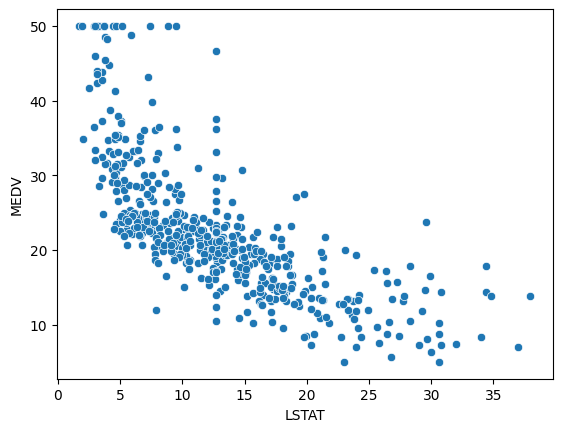

In [81]:

sns.scatterplot(data=df,x="LSTAT",y='MEDV')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

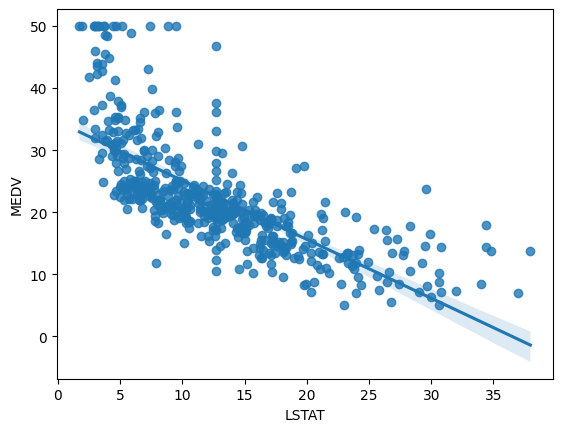

In [82]:
sns.regplot(data=df,x="LSTAT",y='MEDV')

<Axes: >

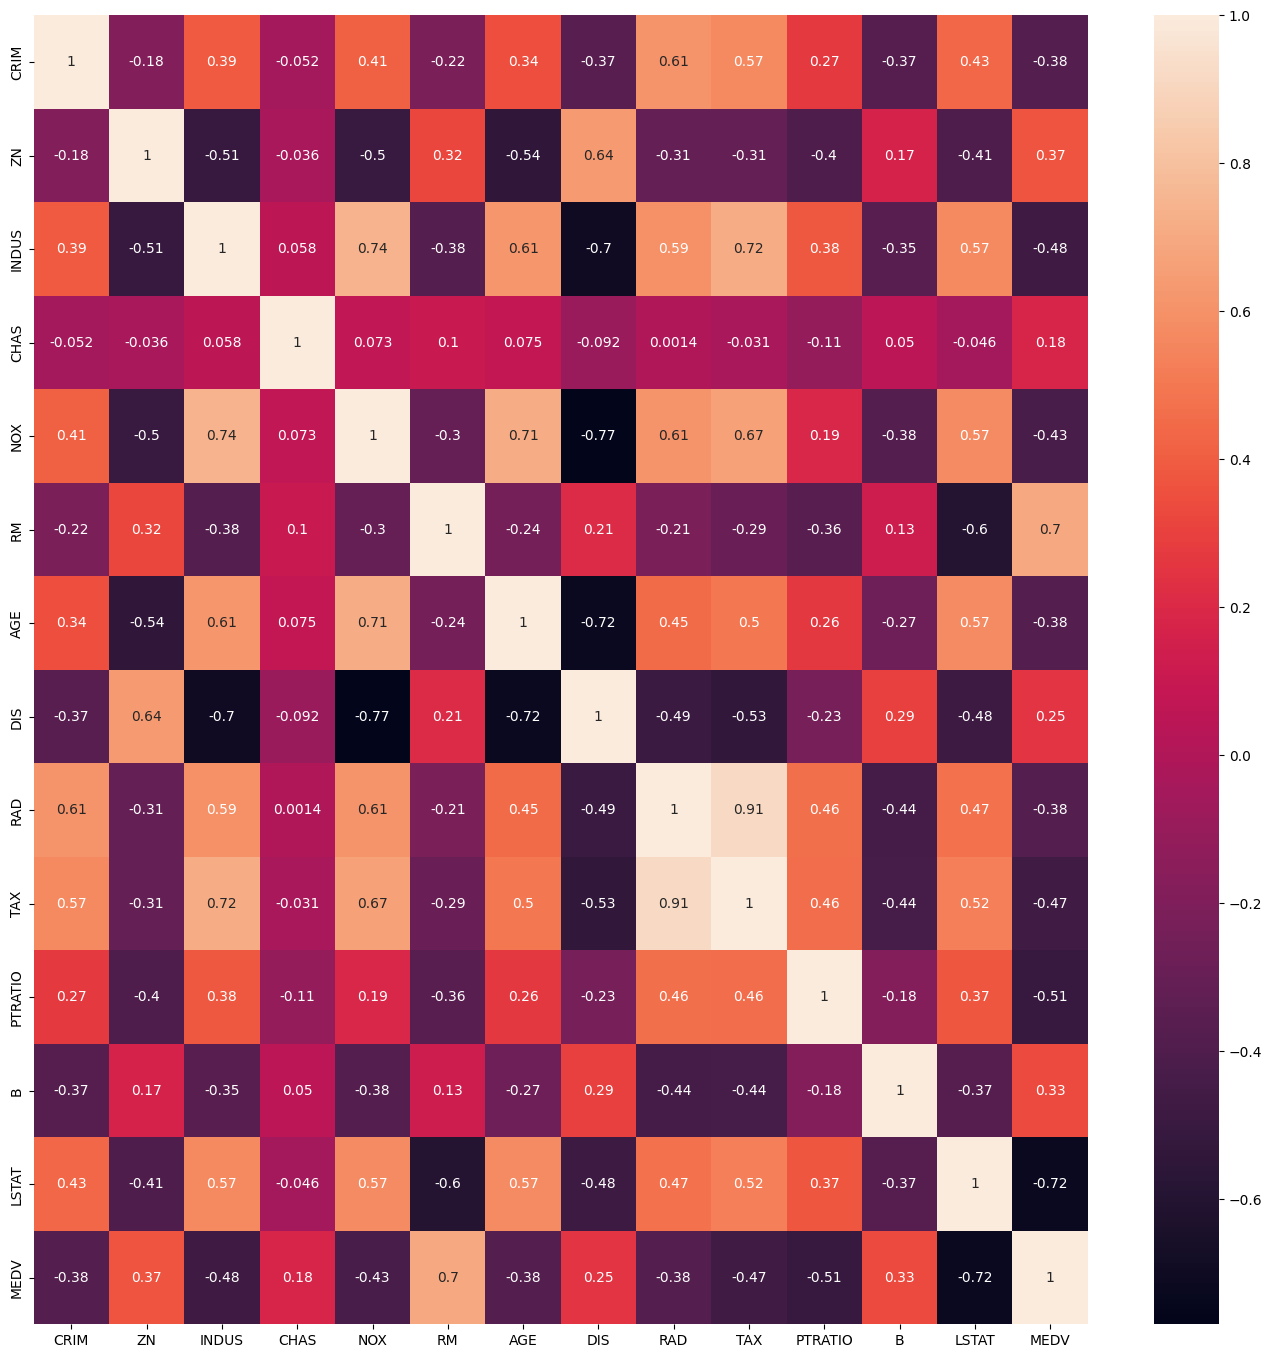

In [83]:
# Headmap show the correlation of each attribute with each other 
# +,- are the slopes
# values of attributes which are very low can be dropped as they reduce the model's efficiency
# ...not done here but can be done

plt.figure(figsize=(17,17))        #reshape the size of graph

sns.heatmap(df.corr(),annot=True)